#Importing libraries and tools

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import itertools
import datetime
from nltk.corpus import wordnet
from wordcloud import WordCloud
import calendar
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load the dataset
df = pd.read_csv("tweets.csv")
df

,Unnamed: 0,Time,User,Tweet
0,0,2022-12-28 05:42:33+00:00,SixDegrees9,RT @MartyTa94849826: When Trump lost in 2020 h...
1,1,2022-12-28 05:41:10+00:00,susanjsee,RT @MartyTa94849826: When Trump lost in 2020 h...
2,2,2022-12-28 05:36:45+00:00,Srinivas2540,"RT @livemint: ""In case of minor YouTubers, tax..."
3,3,2022-12-28 05:36:31+00:00,grandmagrit,RT @MartyTa94849826: When Trump lost in 2020 h...
4,4,2022-12-28 05:20:50+00:00,business_today,#AskMoneyToday | The increasing medical inflat...
...,...,...,...,...
95,95,2022-12-27 19:47:18+00:00,dmellieon,RT @CNET: Wesson used genetically modified ing...
96,96,2022-12-27 19:37:56+00:00,detroitnews,Millennial Money: Is meal kit delivery still w...
97,97,2022-12-27 19:32:33+00:00,KULDEEP20214O,RT @gganeshhh: Child youtubers are paying inco...
98,98,2022-12-27 19:30:08+00:00,DasFintechBot,RT @FinancialSpring: We’re here to make borrow...


In [ ]:
#preparing the text and sort of cleaning.
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;\n]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
#LINKS = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    
    text = re.sub(r'\$\w*', '', text)
    text = re.sub(r'RT\s*@[^:]*:\s*', '', text)
    text = re.sub(r'#', '', text)
    text = text.lower() # lowercase text
    #text = LINKS.sub(' ', text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in (STOPWORDS)]) # delete stopwords from text
    return text

In [ ]:
df['Tweet_prepared'] = [text_prepare(x) for x in df['Tweet']]
df

,Unnamed: 0,Time,User,Tweet,Tweet_prepared
0,0,2022-12-28 05:42:33+00:00,SixDegrees9,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...
1,1,2022-12-28 05:41:10+00:00,susanjsee,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...
2,2,2022-12-28 05:36:45+00:00,Srinivas2540,"RT @livemint: ""In case of minor YouTubers, tax...",case minor youtubers taxability income gets co...
3,3,2022-12-28 05:36:31+00:00,grandmagrit,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...
4,4,2022-12-28 05:20:50+00:00,business_today,#AskMoneyToday | The increasing medical inflat...,askmoneytoday increasing medical inflation nec...
...,...,...,...,...,...
95,95,2022-12-27 19:47:18+00:00,dmellieon,RT @CNET: Wesson used genetically modified ing...,wesson used genetically modified ingredients v...
96,96,2022-12-27 19:37:56+00:00,detroitnews,Millennial Money: Is meal kit delivery still w...,millennial money meal kit delivery still worth...
97,97,2022-12-27 19:32:33+00:00,KULDEEP20214O,RT @gganeshhh: Child youtubers are paying inco...,child youtubers paying income tax wow https tc...
98,98,2022-12-27 19:30:08+00:00,DasFintechBot,RT @FinancialSpring: We’re here to make borrow...,make borrowing easy possible sign phone appoin...


In [ ]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [ ]:
df['Tweet_Cleaned'] = [process_tweet(x) for x in df['Tweet']]
df

,Unnamed: 0,Time,User,Tweet,Tweet_prepared,Tweet_Cleaned
0,0,2022-12-28 05:42:33+00:00,SixDegrees9,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...,"[trump, lost, 2020, still, owe, russia, save, ..."
1,1,2022-12-28 05:41:10+00:00,susanjsee,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...,"[trump, lost, 2020, still, owe, russia, save, ..."
2,2,2022-12-28 05:36:45+00:00,Srinivas2540,"RT @livemint: ""In case of minor YouTubers, tax...",case minor youtubers taxability income gets co...,"[case, minor, youtub, taxabl, incom, get, comp..."
3,3,2022-12-28 05:36:31+00:00,grandmagrit,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...,"[trump, lost, 2020, still, owe, russia, save, ..."
4,4,2022-12-28 05:20:50+00:00,business_today,#AskMoneyToday | The increasing medical inflat...,askmoneytoday increasing medical inflation nec...,"[askmoneytoday, increas, medic, inflat, necess..."
...,...,...,...,...,...,...
95,95,2022-12-27 19:47:18+00:00,dmellieon,RT @CNET: Wesson used genetically modified ing...,wesson used genetically modified ingredients v...,"[wesson, use, genet, modifi, ingredi, veget, o..."
96,96,2022-12-27 19:37:56+00:00,detroitnews,Millennial Money: Is meal kit delivery still w...,millennial money meal kit delivery still worth...,"[millenni, money, meal, kit, deliveri, still, ..."
97,97,2022-12-27 19:32:33+00:00,KULDEEP20214O,RT @gganeshhh: Child youtubers are paying inco...,child youtubers paying income tax wow https tc...,"[child, youtub, pay, incom, tax, wow, 😂]"
98,98,2022-12-27 19:30:08+00:00,DasFintechBot,RT @FinancialSpring: We’re here to make borrow...,make borrowing easy possible sign phone appoin...,"[’, make, borrow, easi, possibl, 👌, sign, phon..."


In [ ]:
df.shape

(100, 6)

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df

,Time,User,Tweet,Tweet_prepared,Tweet_Cleaned
0,2022-12-28 05:42:33+00:00,SixDegrees9,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...,"[trump, lost, 2020, still, owe, russia, save, ..."
1,2022-12-28 05:41:10+00:00,susanjsee,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...,"[trump, lost, 2020, still, owe, russia, save, ..."
2,2022-12-28 05:36:45+00:00,Srinivas2540,"RT @livemint: ""In case of minor YouTubers, tax...",case minor youtubers taxability income gets co...,"[case, minor, youtub, taxabl, incom, get, comp..."
3,2022-12-28 05:36:31+00:00,grandmagrit,RT @MartyTa94849826: When Trump lost in 2020 h...,trump lost 2020 still owed russia saving compa...,"[trump, lost, 2020, still, owe, russia, save, ..."
4,2022-12-28 05:20:50+00:00,business_today,#AskMoneyToday | The increasing medical inflat...,askmoneytoday increasing medical inflation nec...,"[askmoneytoday, increas, medic, inflat, necess..."
...,...,...,...,...,...
95,2022-12-27 19:47:18+00:00,dmellieon,RT @CNET: Wesson used genetically modified ing...,wesson used genetically modified ingredients v...,"[wesson, use, genet, modifi, ingredi, veget, o..."
96,2022-12-27 19:37:56+00:00,detroitnews,Millennial Money: Is meal kit delivery still w...,millennial money meal kit delivery still worth...,"[millenni, money, meal, kit, deliveri, still, ..."
97,2022-12-27 19:32:33+00:00,KULDEEP20214O,RT @gganeshhh: Child youtubers are paying inco...,child youtubers paying income tax wow https tc...,"[child, youtub, pay, incom, tax, wow, 😂]"
98,2022-12-27 19:30:08+00:00,DasFintechBot,RT @FinancialSpring: We’re here to make borrow...,make borrowing easy possible sign phone appoin...,"[’, make, borrow, easi, possibl, 👌, sign, phon..."


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(df, column_name):
    text = ' '.join(df[column_name].astype(str))
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

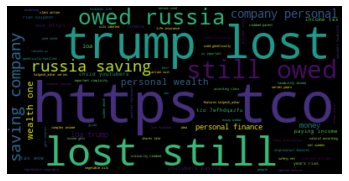

In [ ]:
# word cloud of questions
create_wordcloud(df, 'Tweet_prepared')


In [ ]:
def all_stopwords(stopwords_list):
    ''' return list of all the stopwords including common stop words in english and stopwords list by the user
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    # extend the default stopwords list by adding additional stopwords
    stopwords.extend(stopwords_list)
    return stopwords

In [ ]:
def get_filtered_tokens(df, column_name, stopwords_list):
    ''' tokenize the elements of column of dataframe
    '''
    words_list = df[column_name].tolist()
    stop_words = all_stopwords(stopwords_list)
    tokens = [word_tokenize(i) for i in words_list]
    #error
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_tokens = [word for word in filtered_tokens if len(word) > 5]
    return filtered_tokens

In [ ]:
def most_common_words(filtered_tokens, num_common_words):
    filtered_tokens = list(itertools.chain(*filtered_tokens))
    fdist = nltk.FreqDist(filtered_tokens)
    common_words = fdist.most_common(num_common_words)
    return common_words

In [ ]:
# can add list of additional stopwords depending on the dataset
stopwords = []

# how many most common words to find
num_common_words = 300

In [ ]:
# Tokenization followed by filteration on the basis of stopwords i.e., get the tokens after removing the stopwords
filtered_tokens_answers = get_filtered_tokens(df, 'Tweet_prepared', stopwords)

# list of most common words
common_words = most_common_words(filtered_tokens_answers, num_common_words)
print(common_words)

[('https', 55), ('personal', 53), ('tco', 52), ('saving', 36), ('still', 34), ('wealth', 34), ('one', 34), ('trump', 33), ('lost', 33), ('2020', 33), ('owed', 33), ('russia', 33), ('company', 33), ('else', 33), ('would', 33), ('loa', 32), ('money', 22), ('finance', 20), ('income', 16), ('youtubers', 12), ('child', 8), ('10', 7), ('paying', 7), ('tax', 7), ('wow', 7), ('7wfhdqazfu', 7), ('important', 6), ('life', 6), ('today', 5), ('insurance', 5), ('years', 5), ('rias', 5), ('kalpesh', 5), ('us', 5), ('shares', 5), ('case', 4), ('minor', 4), ('taxability', 4), ('gets', 4), ('complex', 4), ('minors', 4), ('ordinarily', 4), ('clubbed', 4), ('parent', 4), ('shiprasorout', 4), ('features', 4), ('kalpesh_ashar', 4), ('series', 4), ('reminds', 4), ('best', 4), ('finances', 4), ('essay', 4), ('widow', 4), ('late', 4), ('husbands', 4), ('provided', 4), ('safety', 4), ('net', 4), ('sudden', 4), ('death', 4), ('people', 3), ('investing', 3), ('simplicity', 3), ('year', 3), ('2023', 3), ('idea', 

In [ ]:
def find_ngrams(dataset, column_name, n):
    ''' Tokenize the text and find the N-grams
    ''' 
    text_list = dataset[column_name].tolist()
    tokens = [word_tokenize(a) for a in text_list]
    n_grams = [ngrams(t, n) for t in tokens]

    return n_grams

In [ ]:
# N_grams in Answer
n_grams_answer = find_ngrams(df, 'Tweet_prepared', 3)
for g in n_grams_answer:
    print(next(g))

('trump', 'lost', '2020')
('trump', 'lost', '2020')
('case', 'minor', 'youtubers')
('trump', 'lost', '2020')
('askmoneytoday', 'increasing', 'medical')
('trump', 'lost', '2020')
('trump', 'lost', '2020')
('plenty', 'investor', 'events')
('ravivisvesvarayasharadaprasad', 'https', 'tco')
('moneysmart', 'solopreneur', 'personal')
('learn', 'understand', 'money')
('today', 'shiprasorout', 'features')
('trump', 'lost', '2020')
('trump', 'lost', '2020')
('case', 'minor', 'youtubers')
('case', 'minor', 'youtubers')
('case', 'minor', 'youtubers')
('trump', 'lost', '2020')
('mintpremium', 'ashar', 'shares')
('trump', 'lost', '2020')
('new', 'year', 'signifies')
('trump', 'lost', '2020')
('trump', 'lost', '2020')
('trump', 'lost', '2020')
('today', 'shiprasorout', 'features')
('invest', 'money', '2023')
('personal', 'finance', 'money')
('psychology', 'money', 'book')
('trump', 'lost', '2020')
('trump', 'lost', '2020')
('today', 'shiprasorout', 'features')
('trump', 'lost', '2020')
('trump', 'los

In [ ]:
def calculate_vocab_size(dataset, column_name):
    ''' calculate the vocabulary size
    '''
    text_list = dataset[column_name].tolist()
    tokens = [word_tokenize(t) for t in text_list]
    vocab = set([word for t in tokens for word in t])
    vocab_size = len(vocab)
    print(vocab_size)

In [ ]:
# without stopwords
vocab_size_questions = calculate_vocab_size(df, 'Tweet_prepared')

422


In [ ]:
def text_length(dataset, column_name):
    ''' calculate the average length of words in the text eg: Answers
    by taking the sum of the lengths of all the answers in the dataset, divided by the total number of answers
    '''
    text_list = dataset[column_name].tolist()
    tokens = [word_tokenize(t) for t in text_list]
    lengths = [len(t) for t in tokens]
    avg_length = round(sum(lengths) / len(lengths))
    max_length = max(lengths)
    min_length = min(lengths)
    return avg_length, max_length, min_length

In [ ]:
avg_length_questions, max_length_questions, min_length_questions = text_length(df, 'Tweet_prepared')
print('Average length of questions is:', avg_length_questions)
print(f'Maximum and minimum length of questions is {max_length_questions} and {min_length_questions}')

Average length of questions is: 13
Maximum and minimum length of questions is 20 and 9


In [ ]:
df_fico = pd.read_csv("fico_forum_all_data.csv")
df_fico

,post_id,post_date,post_title,post_author,post_text,post_author_rank,reply_date,replier,votes,replier_rank,reply_text
0,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-28,pizzadude,2.0,Moderator,This link has some good information: https:/...
1,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,MarkintheHV,1.0,Regular Contributor,I have been looking at these as well. I have ...
2,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,Anonymalous,3.0,Established Contributor,"Now's the time, if you want to do it. The new ..."
3,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,M_Smart007,2.0,Legendary Contributor,"I bought in May, and went awayWill probably ca..."
4,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,M_Smart007,2.0,Legendary Contributor,"@Anonymalous, In reading your forum post(s) ....."
...,...,...,...,...,...,...,...,...,...,...,...
12456,6526281,2022-04-23,PLOC Banking Strategy w/ I-Bonds,Citylights18,Is there a way to maximize cash flow with a PL...,Valued Contributor,2022-04-26,Citylights18,0.0,Valued Contributor,The entire point of what I've been trying to c...
12457,6526281,2022-04-23,PLOC Banking Strategy w/ I-Bonds,Citylights18,Is there a way to maximize cash flow with a PL...,Valued Contributor,2022-04-26,GatorGuy,1.0,Valued Contributor,Read this whole thread. Seems like a lot of de...
12458,6526281,2022-04-23,PLOC Banking Strategy w/ I-Bonds,Citylights18,Is there a way to maximize cash flow with a PL...,Valued Contributor,2022-04-26,GatorGuy,0.0,Valued Contributor,I disagree with the bolded. Most EFs are 3 to ...
12459,6574183,2022-08-03,Free 24/7 Telehealth for MACU's MyStyle Checki...,Cookiegrabber,"(MACU is spread out around the Utah area, but ...",Regular Contributor,2022-08-05,ISOgoodTacos,1.0,Established Member,Access to the network and no fees for your ses...


In [ ]:
df_fico.columns

Index(['post_id', 'post_date', 'post_title', 'post_author', 'post_text',
       'post_author_rank', 'reply_date', 'replier', 'votes', 'replier_rank',
       'reply_text'],
      dtype='object')

In [ ]:
len(df_fico["post_id"].unique())

487

In [ ]:
df_fico.sort_values(by=["votes"], ascending=False, na_position='first')


,post_id,post_date,post_title,post_author,post_text,post_author_rank,reply_date,replier,votes,replier_rank,reply_text
4564,6547520,2022-06-07,"NIHFCU, Hancock Whitney approvals",ulyssesmama,So I was trying to garden when I got a preappr...,Contributor,2022-06-07,KingRue8500,NaN,Valued Contributor,Congrats on your NIHFCU & Hancock Whitney appr...
4565,6547520,2022-06-07,"NIHFCU, Hancock Whitney approvals",ulyssesmama,So I was trying to garden when I got a preappr...,Contributor,2022-06-07,CreditAggie,NaN,Community Leader Super Contributor,Congratulations on your approvals!
4566,6547520,2022-06-07,"NIHFCU, Hancock Whitney approvals",ulyssesmama,So I was trying to garden when I got a preappr...,Contributor,2022-06-07,Elpadrino1,NaN,Valued Contributor,Congratulations on your approvals!!
4567,6547520,2022-06-07,"NIHFCU, Hancock Whitney approvals",ulyssesmama,So I was trying to garden when I got a preappr...,Contributor,2022-06-07,cashorcharge,NaN,Community Leader Senior Contributor,WooHoo!! Congratulations on your Approvals!!👏🏼🍾🥂
4568,6547520,2022-06-07,"NIHFCU, Hancock Whitney approvals",ulyssesmama,So I was trying to garden when I got a preappr...,Contributor,2022-06-07,babygirl1256,NaN,Senior Contributor,"Congrats on your NIHFCU, Hancock Whitney appro..."
...,...,...,...,...,...,...,...,...,...,...,...
4558,6524427,2022-04-20,Need Reality Check/Advice on Personal Loan,Bunny01,Hi. I'm looking to get a personal loan for $6-...,Member,2022-04-20,sportsguy83,0.0,Regular Contributor,It doesn't seem like you should have any issue...
4560,6621381,2022-12-05,SDFCU personal denied,Meach7,The experience wasn't great. I had a secured c...,Valued Member,2022-12-05,FinStar,0.0,Moderator,"It was the ""call us"" for me 🥸 Almost sounds ..."
4561,6621381,2022-12-05,SDFCU personal denied,Meach7,The experience wasn't great. I had a secured c...,Valued Member,2022-12-06,Janneman,0.0,Established Contributor,Sorry but don't know what to make out of these...
4562,6621381,2022-12-05,SDFCU personal denied,Meach7,The experience wasn't great. I had a secured c...,Valued Member,2022-12-07,Meach7,0.0,Valued Member,"That's crazy, I verified a bunch of medicos fr..."


In [ ]:
#Function Definition
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    


#functioncall  
display_missing(df_fico)

post_id column missing values: 0
post_date column missing values: 0
post_title column missing values: 0
post_author column missing values: 34
post_text column missing values: 7
post_author_rank column missing values: 0
reply_date column missing values: 0
replier column missing values: 99
votes column missing values: 5
replier_rank column missing values: 0
reply_text column missing values: 224




In [ ]:
df_fico['votes'].isna().sum()

5

In [ ]:
df_fico['votes'].isnull().sum()

5

In [ ]:
df_fico["votes"].value_counts()

5.0     1807
4.0     1712
6.0     1641
0.0     1383
7.0     1286
1.0     1128
3.0     1086
2.0      793
8.0      773
9.0      399
10.0     224
11.0     112
12.0      57
13.0      28
14.0      15
15.0       9
16.0       2
17.0       1
Name: votes, dtype: int64

In [ ]:
df_fico[["post_text","votes"]].sort_values(by="votes", ascending=False)

,post_text,votes
6224,Welcome Garden Club Members! Welcome all n...,17.0
6220,Welcome Garden Club Members! Welcome all n...,16.0
2650,Welcome Garden Club Members! Welcome all ...,16.0
2648,Welcome Garden Club Members! Welcome all ...,15.0
11587,Welcome Garden Club Members! Welcome all n...,15.0
...,...,...
4564,So I was trying to garden when I got a preappr...,NaN
4565,So I was trying to garden when I got a preappr...,NaN
4566,So I was trying to garden when I got a preappr...,NaN
4567,So I was trying to garden when I got a preappr...,NaN


In [ ]:
len(df_fico["post_id"].unique())

487

In [ ]:
len(df_fico["post_title"].unique())

486

In [ ]:
df_fico.groupby(["post_id", "post_text", "reply_text"]).sum().sort_values(by="votes",ascending=False)

votes
post_id post_text                                          reply_text                                               
6572781 Welcome  Garden Club Members!    Welcome all ne... 🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿                                        78.0
6610472 Welcome  Garden Club Members!     Welcome all n... Congratulations!!                                    30.0
6530137 Welcome  Garden Club Members!    Welcome all ne... Thanks!                                              26.0
6513376 Welcome  Garden Club Members!    Welcome all ne... Morning, @Dinosaur!                                  25.0
6544096 Welcome  Garden Club Members!  Welcome all new ... Congratulations!!                                    23.0
...                                                                                                              ...
6488544 Hello everyone! I just found out about this and... @FreedomHammer Yes, that does seem excessive. H...    0.0
                                                           Thanks! I appreciate the info. Will definitely ...    0.0
6489149 I'm planning on moving and wondering what curre... I don't remember having to provide any official...    0.0
                                                           I recently applied (NY) and was able to supply ...    0.0
6538624 I was opening several checking accounts recentl... You can use SoFi without using Plaid (to fund y...    0.0

[12096 rows x 1 columns]

In [ ]:
df_fico.groupby(["post_id"]).sum().sort_values(by="votes",ascending=False)

,votes
post_id,
6513376,5607.0
6466543,5211.0
6497713,4907.0
6610472,4636.0
6586753,4485.0
...,...
6477361,0.0
6476819,0.0
6611104,0.0


In [ ]:
print(df_fico["post_date"].min())
print(df_fico["post_date"].max())

2021-12-31
2022-12-23
